<a href="https://colab.research.google.com/github/yasshf/MicroService/blob/main/YassineML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅**Course Completion Prediction Notebook**

In [240]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [241]:
df = pd.read_csv(r"/content/Student_Satisfaction_Survey.csv", encoding='windows-1252')
df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teacher’s approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


# ✅**Exploratory Data Analysis (EDA):**

In [242]:
# Check basic info
df.info()
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB

Missing Values:
 SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1           

In [243]:
# Summary for numerical columns
df.describe()
# Summary for categorical columns
df.select_dtypes(include='object').describe()

,Questions,Average/ Percentage,Course Name,Basic Course
count,580,580,580,580
unique,20,152,29,16
top,How much of the syllabus was covered in the cl...,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,BACHELOR OF SCIENCE
freq,29,59,20,60


In [244]:
# Split using the exact delimiter: space-slash-space
df[['Average Score', 'Percentage']] = df['Average/ Percentage'].str.split(' / ', expand=True)

# Convert to float
df['Average Score'] = pd.to_numeric(df['Average Score'], errors='coerce')
df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')


In [245]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course',
       'Average Score', 'Percentage'],
      dtype='object')

In [246]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
Average Score           0
Percentage              0
dtype: int64


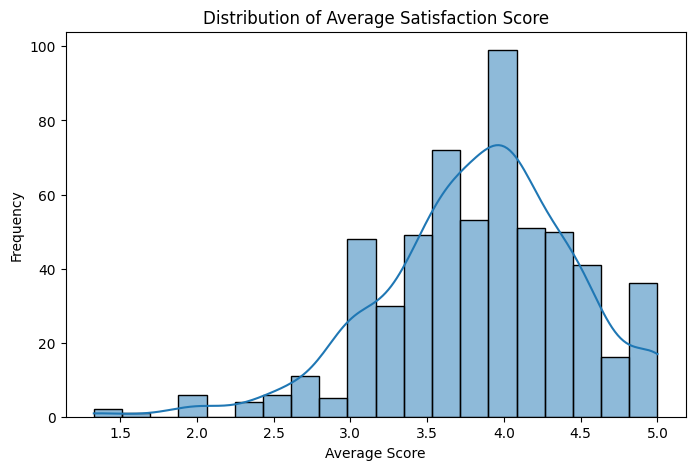

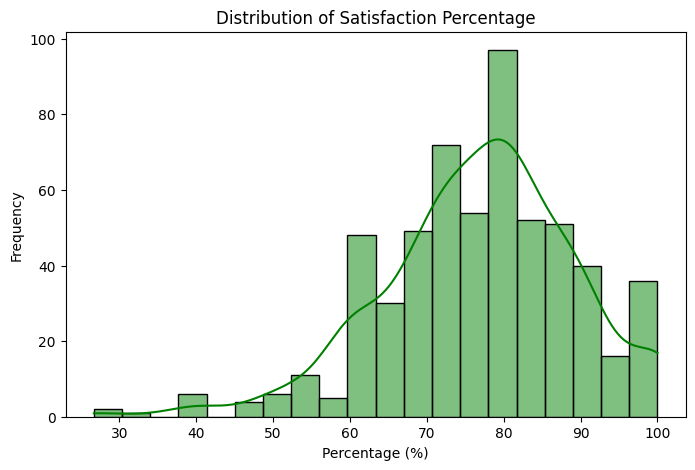

In [247]:
# Plot distribution of Average Score
plt.figure(figsize=(8, 5))
sns.histplot(df['Average Score'], bins=20, kde=True)
plt.title("Distribution of Average Satisfaction Score")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()

# Plot distribution of Percentage
plt.figure(figsize=(8, 5))
sns.histplot(df['Percentage'], bins=20, kde=True, color='green')
plt.title("Distribution of Satisfaction Percentage")
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")
plt.show()


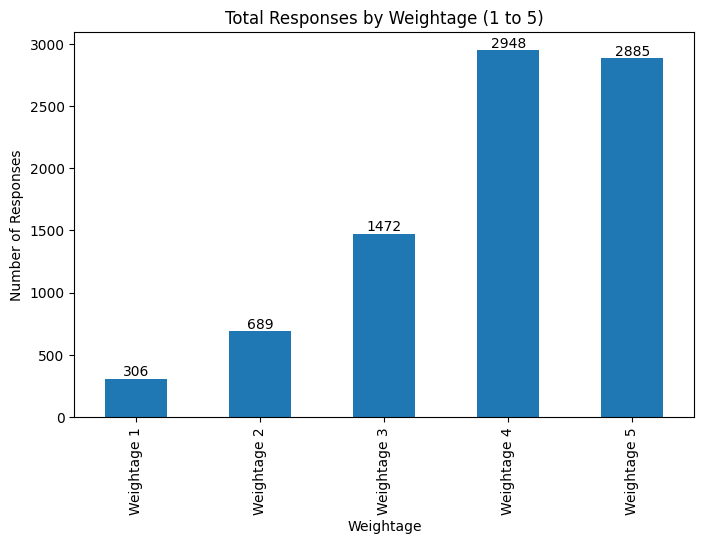

In [248]:
import matplotlib.pyplot as plt

# Plot total responses per weightage (1 to 5)
weightage_cols = ['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']
ax = df[weightage_cols].sum().plot(kind='bar', figsize=(8, 5))
plt.title('Total Responses by Weightage (1 to 5)')
plt.xlabel('Weightage')
plt.ylabel('Number of Responses')

# Add values on top of bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Display integer value
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position (x, y)
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset from bar top
        textcoords='offset points'
    )

plt.show()

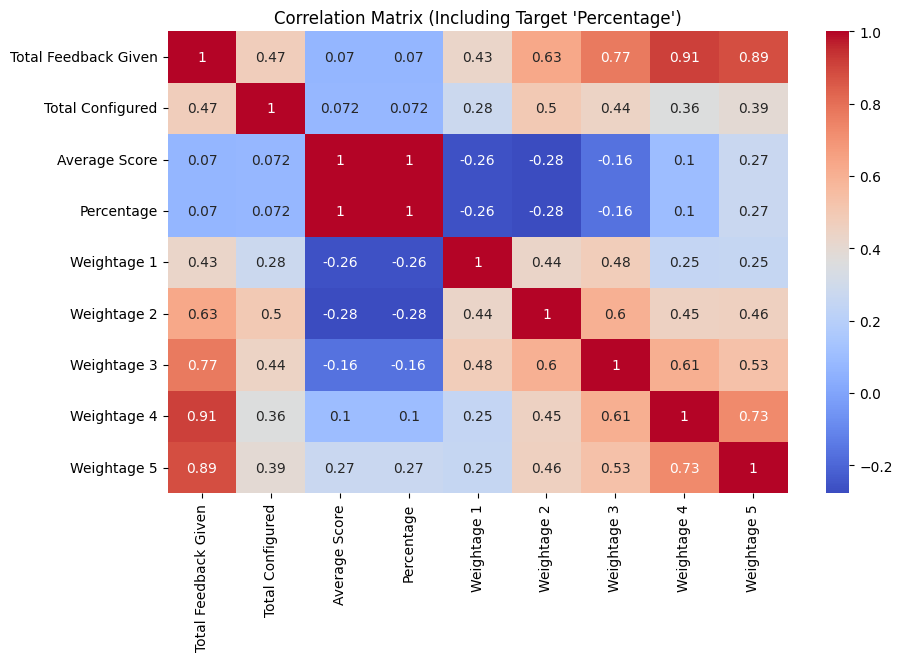

In [249]:
# Correlation heatmap with the target 'Percentage'
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Total Feedback Given', 'Total Configured', 'Average Score', 'Percentage'] + weightage_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Including Target 'Percentage')")
plt.show()


In [250]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course',
       'Average Score', 'Percentage'],
      dtype='object')

**feature engineering**

In [251]:
df

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Average Score,Percentage
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.00,60.00
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.00,100.00
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.00,100.00
3,4,1,12,The teacher’s approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.00,60.00
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,4.00,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,16,9,170,The institute/ teachers use student-centric me...,1,0,0,2,6,4.33 / 86.67,TYBSC,BACHELOR OF SCIENCE,4.33,86.67
576,17,9,170,Teachers encourage you to participate in extra...,0,0,0,3,6,4.67 / 93.33,TYBSC,BACHELOR OF SCIENCE,4.67,93.33
577,18,9,170,Efforts are made by the institute/ teachers to...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE,4.56,91.11
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE,4.44,88.89


In [252]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Basic Course'] = label_encoder.fit_transform(df['Basic Course'])
df['Course Name '] = label_encoder.fit_transform(df['Course Name '])


In [253]:
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Average Score,Percentage
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,0,1,3.0,60.0
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,0,1,5.0,100.0
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,0,1,5.0,100.0
3,4,1,12,The teacher’s approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,0,1,3.0,60.0
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,0,1,4.0,80.0


In [254]:
df = df.drop(columns=['Questions','Average/ Percentage','Average Score','SN'])

In [255]:
df

,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Course Name,Basic Course,Percentage
0,1,12,0,0,1,0,0,0,1,60.00
1,1,12,0,0,0,0,1,0,1,100.00
2,1,12,0,0,0,0,1,0,1,100.00
3,1,12,0,0,1,0,0,0,1,60.00
4,1,12,0,0,0,1,0,0,1,80.00
...,...,...,...,...,...,...,...,...,...,...
575,9,170,1,0,0,2,6,28,7,86.67
576,9,170,0,0,0,3,6,28,7,93.33
577,9,170,0,0,1,2,6,28,7,91.11
578,9,170,0,0,1,3,5,28,7,88.89


In [256]:
df.columns

Index(['Total Feedback Given', 'Total Configured', 'Weightage 1',
       'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5',
       'Course Name ', 'Basic Course', 'Percentage'],
      dtype='object')

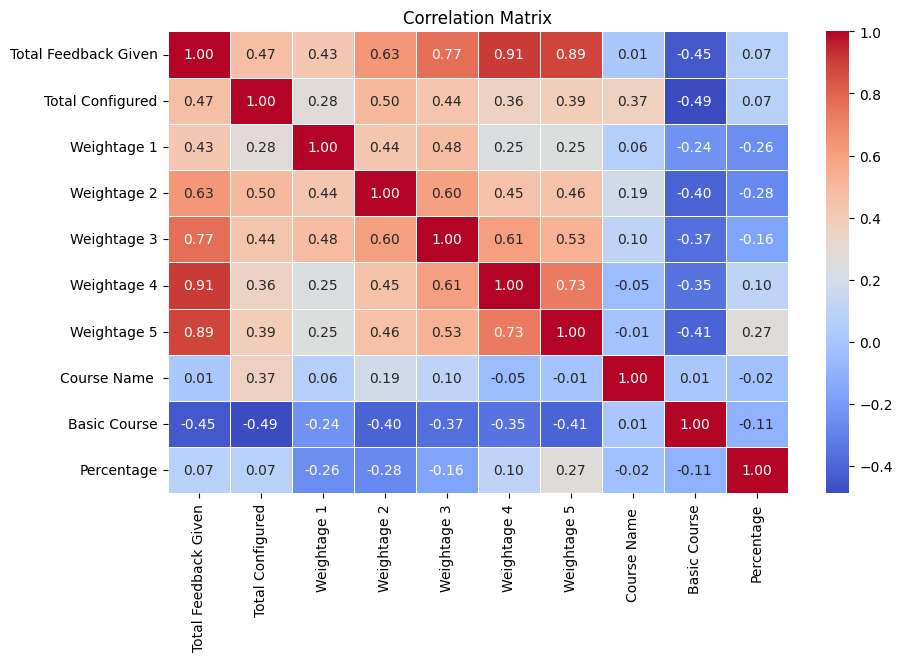

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame, and it has already been preprocessed

# List of features to consider for the correlation matrix
features = ['Total Feedback Given', 'Total Configured', 'Weightage 1',
            'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5',
            'Course Name ', 'Basic Course', 'Percentage']

# Calculate the correlation matrix
corr_matrix = df[features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# **Feature scaling**

In [258]:
df

,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Course Name,Basic Course,Percentage
0,1,12,0,0,1,0,0,0,1,60.00
1,1,12,0,0,0,0,1,0,1,100.00
2,1,12,0,0,0,0,1,0,1,100.00
3,1,12,0,0,1,0,0,0,1,60.00
4,1,12,0,0,0,1,0,0,1,80.00
...,...,...,...,...,...,...,...,...,...,...
575,9,170,1,0,0,2,6,28,7,86.67
576,9,170,0,0,0,3,6,28,7,93.33
577,9,170,0,0,1,2,6,28,7,91.11
578,9,170,0,0,1,3,5,28,7,88.89


In [259]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler (Standardization)
scaler = StandardScaler()

# Define the feature columns excluding the target (Percentage)
features = ['Total Feedback Given', 'Total Configured', 'Weightage 1',
            'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5',
            'Course Name ', 'Basic Course']

# Apply scaling to the features
df[features] = scaler.fit_transform(df[features])

df.head()

,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Course Name,Basic Course,Percentage
0,-0.80797,-0.703865,-0.404526,-0.705054,-0.482027,-0.697989,-0.766510,-1.67332,-1.603192,60.0
1,-0.80797,-0.703865,-0.404526,-0.705054,-0.795453,-0.697989,-0.612411,-1.67332,-1.603192,100.0
2,-0.80797,-0.703865,-0.404526,-0.705054,-0.795453,-0.697989,-0.612411,-1.67332,-1.603192,100.0
3,-0.80797,-0.703865,-0.404526,-0.705054,-0.482027,-0.697989,-0.766510,-1.67332,-1.603192,60.0
4,-0.80797,-0.703865,-0.404526,-0.705054,-0.795453,-0.560664,-0.766510,-1.67332,-1.603192,80.0


In [260]:
from sklearn.model_selection import train_test_split

# Assuming X_scaled contains the scaled features and target is the target variable (Percentage)

X = df[['Total Feedback Given', 'Total Configured', 'Weightage 1',
        'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5',
        'Course Name ', 'Basic Course']]  # Features
y = df['Percentage']  # Target (Percentage)

# Step 2: Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split by checking the shape
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (464, 9)
X_test shape: (116, 9)
y_train shape: (464,)
y_test shape: (116,)


**Models**

In [261]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import KBinsDiscretizer

# Assuming you already have your X_train, X_test, y_train, y_test available
# Discretize the continuous target into bins
kbin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_train_binned = kbin.fit_transform(y_train.values.reshape(-1, 1))
y_test_binned = kbin.transform(y_test.values.reshape(-1, 1))

# Define the models dictionary for regression
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVM": SVR(kernel='rbf'),
    "Linear Regression": LinearRegression()
}

# Initialize a list to store the results
results = []

# Loop through models, train, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Convert predictions into bins as well
    y_pred_binned = kbin.transform(y_pred.reshape(-1, 1))

    # Get classification report
    report = classification_report(y_test_binned, y_pred_binned, output_dict=True)

    # Extract the metrics for accuracy, precision, recall, f1-score, and support
    model_metrics = {
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'Support': report['weighted avg']['support']
    }

    # Append the metrics to the results list
    results.append(model_metrics)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results
print("\nModel Evaluation Report:")
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 464, number of used features: 9
[LightGBM] [Info] Start training from score 76.343211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai